In [1]:
from my_utils import *
set_width_max_of_jupyterpad()


Welcome to JupyROOT 6.14/04
['/workdir/jupyter/tot_data_taking_data/ID73_HV1600V_ptime_15_thr_30_gain_4_boardsON_0_sr_15.root']
data file   , tot_mostprob signalcounts noisecounts sn_ratio significance
data entries: 23556
0 ID73_HV1600V_ptime_15_thr_30_gain_4_boardsON_0_sr_15. | sn-dist #0010 [ns] =  128.00 | sn-dist #0101 [ns] =  117.33


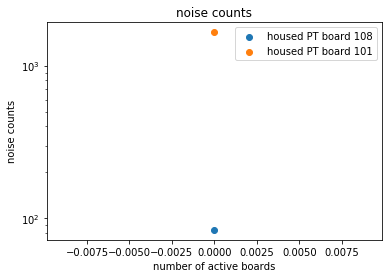

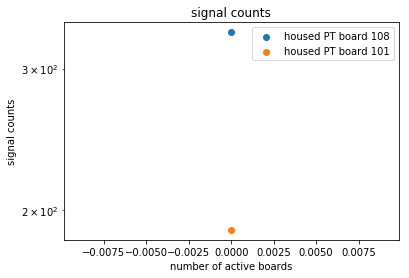

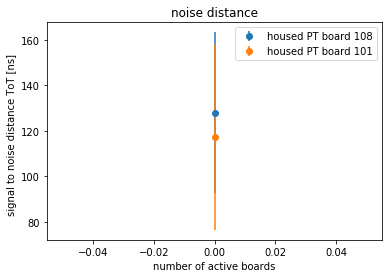

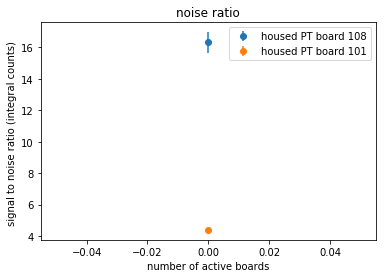

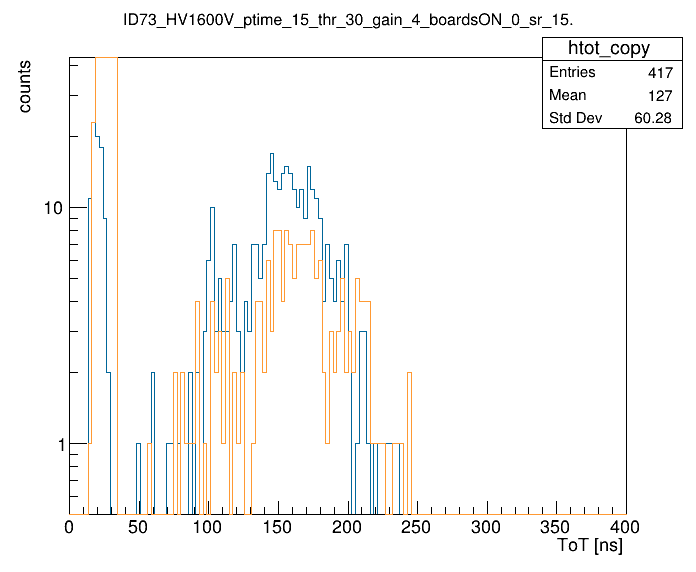

In [2]:

import ROOT
import pickle
import numpy as np 
import math
from matplotlib import pyplot as plt
 
list_file="/workdir/jupyter/tot_data_taking_data/datasetID_73_list.pickle"
# list_file="/workdir/jupyter/tot_data_taking_data/datasetID_25_list.txt"
# list_file="/workdir/jupyter/tot_data_taking_data/datasetID_41_list.txt"
# list_file="/workdir/jupyter/tot_data_taking_data/datasetID_51_list.txt"

tot_noise_threshold = 55
tot_max_signal = 300
# ID11: Sr90 full parameter  scan at working point



##################################################
##               slurp root file                ##
##################################################

# ID 31: PT parameter space full scan (1600V, sr 15)
if ".pickle" in list_file:
    with open (list_file,'rb') as fp:
     data_file_list = pickle.load(fp) 
if ".txt" in list_file:
     f = open(list_file, 'r')
     data_file_list = f.read().split('\n')
     f.close()
     del data_file_list[len(data_file_list)-1]


## only for ID35, remove  all files with sr_15, as data taking was killed then 
#data_file_list = [ x for x in data_file_list if "sr_15" not in x ]

## take only files with gain_4:
# data_file_list = [ x for x in data_file_list if "gain_4"  in x ]
# data_file_list = [ x for x in data_file_list if "thr_35"  in x ]
print(data_file_list)

i = -1
clist = [None]*100
print("data file   ,", "tot_mostprob", "signalcounts", "noisecounts", "sn_ratio", "significance")

tot_mostprob_list = []
tot_sn_distance1 = [[],[],[],[],[]]
tot_sn_distance2 = [[],[],[],[],[]]

n_plot_data = 2
tot_plot_data_label = ["noise counts","signal counts"]
tot_plot_data = [[[] for j in range(2)] for i in range(n_plot_data)]
tot_plot_data_error =  [[[] for j in range(2)] for i in range(n_plot_data)]


for data_file in data_file_list:
    i += 1
    #if i == 30:
    #    break
    #print(data_file)
    f = ROOT.TFile("{:s}".format(data_file))
    tree = f.Get("joint_tree")
    print("data entries: " + str(tree.GetEntries()))
    ## plot data:
    clist[i] = ROOT.TCanvas("myCanvasName"+str(i),str(data_file),700,600)
#     tree.Draw("tot>>htot2(300,0,300)","chan > 150301 && chan < 150303")
#     tree.Draw("tot>>htot(300,0,300)","chan > 035313 && chan < 035315","same")  
    tree.Draw("tot>>htot(150,0,400)","chan > 150300 && chan < 150316")
    tree.Draw("tot>>htot2(150,0,400)","chan > 035300 && chan < 035316","same")     
    tree.Draw("tot>>htot3(100,0,400)","chan > 150315 && chan < 150332","same")  
    tree.Draw("tot>>htot4(100,0,400)","chan > 150331 && chan < 150348","same")  
    clist[i].Draw()
    htot = f.Get("htot")
    htot2 = f.Get("htot2")
    htot3 = f.Get("htot3")
    htot4 = f.Get("htot4")
    clist[i].SetLogy()
    htot.GetXaxis().SetTitle("ToT [ns]")
    htot.GetYaxis().SetTitle("counts")
    htot.SetTitle(data_file.strip("workdir/jupyter/tot_data_taking_data"))
 
    

    #htot.ShowPeaks(2,"",0.5)
#     spectrum_peaks = ROOT.TSpectrum(4);
#     nfound_peaks = spectrum_peaks.Search(htot,2,"",0.5)  
#     if nfound_peaks < 2: 
#        nfound_peaks = spectrum_peaks.Search(htot,2,"",0.01)  
        
#     if nfound_peaks > 0:
#            xpeaks = spectrum_peaks.GetPositionX();
#            tot_mostprob_noise = xpeaks[0]
#            tot_mostprob_signal = xpeaks[1]
#            #print (xpeaks[0],xpeaks[1],xpeaks[2])
#            sn_distance = math.fabs(tot_mostprob_noise-tot_mostprob_signal)
#     else:
#        sn_distance = -1
#     clist[i].Draw()
    htot.SetLineColor(864)
    htot2.SetLineColor(801)    
    htot.DrawCopy("")
    htot2.DrawCopy("same")
#     htot3.SetLineColor(2)
#     htot3.DrawCopy("")
#     htot4.SetLineColor(8)
#     htot4.DrawCopy("same")
    
#     tot_mostprob = htot.GetXaxis().GetBinCenter(htot.GetMaximumBin())
#     tot_mostprob_list += [ sn_distance ]

    from root_fit import *
    print( i, htot.GetTitle() , "| sn-dist #0010 [ns] = ",   "{:.2f}".format(get_signal_to_noise_distance_tot(htot,tot_noise_threshold)) , "| sn-dist #0101 [ns] = ",   "{:.2f}".format(get_signal_to_noise_distance_tot(htot2,80)) )
    tot_sn_distance1[0] += [ get_signal_to_noise_distance_tot(htot,tot_noise_threshold) ]
    tot_sn_distance1[2] += [ get_signal_to_noise_distance_tot_error(htot,tot_noise_threshold) ]
    tot_sn_distance2[0] += [ get_signal_to_noise_distance_tot(htot2,tot_noise_threshold) ]
    tot_sn_distance2[2] += [ get_signal_to_noise_distance_tot_error(htot2,tot_noise_threshold) ]    
    int_signal = htot.Integral(htot.FindBin(tot_noise_threshold),htot.FindBin(tot_max_signal))
    int_noise = htot.Integral(1,htot.FindBin(tot_noise_threshold))+htot.Integral(htot.FindBin(tot_max_signal),htot.GetNbinsX())
    if int_signal < 10 or int_noise < 10:
        int_signal = 0
        int_noise = -1
    #tot_sn_distance1[1] += [ int_signal/int_noise  ]
    tot_sn_distance1[1] += [ int_signal/math.sqrt(abs(int_signal + int_noise)) ] 
    tot_sn_distance1[3] += [ math.sqrt(int_signal)/int_noise  + int_signal/(int_noise**(3/2))  ]   
    tot_plot_data[0][0] += [int_noise]
    tot_plot_data[1][0] += [int_signal]
    
    int_signal = htot2.Integral(htot.FindBin(tot_noise_threshold),htot.GetNbinsX())
    int_noise = htot2.Integral(1,htot.FindBin(tot_noise_threshold))
    if int_signal < 10 or int_noise < 10:
        int_signal = 0
        int_noise = -1
    tot_plot_data[0][1] += [int_noise]
    tot_plot_data[1][1] += [int_signal]
    #tot_sn_distance2[1] += [ int_signal/int_noise  ]
    #significance
    tot_sn_distance2[1] += [ int_signal/math.sqrt(abs(int_signal + int_noise)) ]  
#     tot_sn_distance2[3] += [ int_signal/int_noise*(1/math.sqrt(int_signal) +1/math.sqrt(int_noise))  ] 
    tot_sn_distance2[3] += [ math.sqrt(int_signal)/int_noise  + int_signal/(int_noise**(3/2))  ] 
    #tot_sn_distance2[3] += [ (math.sqrt(int_signal)(int_signal+2*int_noise)  + math.sqrt(int_noise)*int_signal)/(int_noise**(3/2)) ] 
       
    
#plt.scatter(range(0,len(tot_mostprob_list)),tot_mostprob_list)
#plt.yscale('log')
#plt.show
%matplotlib inline

for i in range(0,n_plot_data):
#     plt.errorbar(range(0,len(tot_plot_data[i][0])),tot_sn_distance2[0], yerr=tot_sn_distance2[2], fmt='o', label='housed PT board 101')
#     plt.scatter(range(0,len(tot_plot_data[i][0])),tot_plot_data[i][0], label='bonded PT board 010')
    plt.scatter(range(0,len(tot_plot_data[i][0])),tot_plot_data[i][0], label='housed PT board 108')
    plt.scatter(range(0,len(tot_plot_data[i][1])),tot_plot_data[i][1], label='housed PT board 101')    
    plt.title(tot_plot_data_label[i])
#     plt.xlabel("threshold")
    plt.xlabel("number of active boards")
    plt.ylabel(tot_plot_data_label[i])
    plt.yscale('log')
    plt.legend()
    plt.show()

# plt.errorbar(range(0,len(tot_sn_distance1[0])),tot_sn_distance1[0], yerr=tot_sn_distance1[2], fmt='o', label='bonded PT board 010')
plt.errorbar(range(0,len(tot_sn_distance1[0])),tot_sn_distance1[0], yerr=tot_sn_distance1[2], fmt='o', label='housed PT board 108')
#plt.scatter(range(0,len(tot_sn_distance1[0])),tot_sn_distance1[0])


plt.errorbar(range(0,len(tot_sn_distance2[0])),tot_sn_distance2[0], yerr=tot_sn_distance2[2], fmt='o', label='housed PT board 101')
# plt.scatter(range(0,len(tot_sn_distance2[0])),tot_sn_distance2[0])
plt.title("noise distance")
# plt.xlabel("threshold")
plt.xlabel("number of active boards")
plt.ylabel("signal to noise distance ToT [ns]  ")

plt.legend()
plt.show()

# plt.errorbar(range(0,len(tot_sn_distance1[1])),tot_sn_distance1[1], yerr=tot_sn_distance1[3], fmt='o', label='housed PT board 010')
plt.errorbar(range(0,len(tot_sn_distance1[1])),tot_sn_distance1[1], yerr=tot_sn_distance1[3], fmt='o', label='housed PT board 108')
# plt.scatter(range(0,len(tot_sn_distance1[1])),tot_sn_distance1[1])


plt.errorbar(range(0,len(tot_sn_distance2[1])),tot_sn_distance2[1], yerr=tot_sn_distance2[3], fmt='o', label='housed PT board 101')
# plt.scatter(range(0,len(tot_sn_distance2[1])),tot_sn_distance2[1])
plt.title("noise ratio")
# plt.xlabel("threshold")
plt.xlabel("number of active boards")
plt.ylabel("signal to noise ratio (integral counts) ")
#plt.yscale('log')
plt.legend()
plt.show()

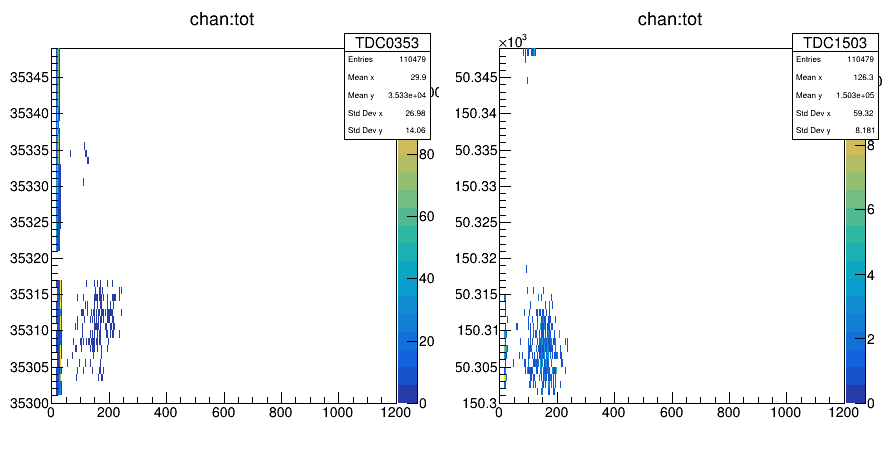

In [3]:
##################################################
##             overview TDC 0x0351              ##
##################################################
c = ROOT.TCanvas("myCanvasName","The Canvas Title",900,480)
c.Divide(2,1)

tdc=353
disp_channels = 49
#tree.Draw("chan:t1","","lego2")
c.cd(1)
tree.Draw("chan:tot>>TDC0353(400,0,1200,{:d},{:d},{:d})".format(disp_channels,tdc*100,tdc*100+disp_channels),"","colz")
c.SetLogz(1)
c.Draw()
c.cd(2)
tdc=1503
tree.Draw("chan:tot>>TDC1503(400,0,1200,{:d},{:d},{:d})".format(disp_channels,tdc*100,tdc*100+disp_channels),"","colz")
c.SetLogz(1)
c.Draw()
